# 라이브러리

In [6]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
#%matplotlib notebook
#import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree

import graphviz

from tqdm import tqdm_notebook

# Load data
 - HN16_ALL.sas7bdat : 설문지 데이터

In [3]:
df_data = pd.read_sas("./HN16_ALL.sas7bdat", format = 'sas7bdat', encoding='iso-8859-1')
print("df_all.shape : ", df_data.shape)
df_data.head()

df_all.shape :  (8150, 768)


,mod_d,ID,ID_fam,year,region,town_t,apt_t,psu,sex,age,...,N_VA_RAE,N_CAROT,N_RETIN,N_B1,N_B2,N_NIAC,N_VITC,LF_secur_y,LF_BUYER,LF_SAFE
0,2018.02.01.,A651172801,A6511728,2016.0,1.0,1.0,2.0,A651,1.0,61.0,...,68.125541,817.506495,0.000000,1.812120,1.599025,17.241284,417.773500,1.0,1.0,1.0
1,2018.02.01.,A651172802,A6511728,2016.0,1.0,1.0,2.0,A651,2.0,57.0,...,91.302698,1095.561039,0.005945,1.075103,0.756771,5.302599,31.845311,1.0,1.0,1.0
2,2018.02.01.,A651183001,A6511830,2016.0,1.0,1.0,2.0,A651,2.0,41.0,...,261.852637,2147.567940,82.888642,1.093273,0.939505,16.655787,29.051934,1.0,2.0,2.0
3,2018.02.01.,A651183002,A6511830,2016.0,1.0,1.0,2.0,A651,1.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018.02.01.,A651183003,A6511830,2016.0,1.0,1.0,2.0,A651,2.0,38.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 데이터 전처리

In [90]:
mini_df_data = pd.DataFrame(df_data, columns=[
    df_data.HE_HP.name ,
    df_data.region.name ,
    df_data.sex.name ,
    df_data.age.name ,
    df_data.incm.name ,
    df_data.ho_incm.name ,
    df_data.edu.name ,
    df_data.occp.name ,
    df_data.cfam.name ,
    df_data.allownc.name ,
    df_data.house.name ,
    df_data.live_t.name ,
    df_data.ainc_1.name ,
    df_data.ainc.name ,
    df_data.marri_1.name ,
    df_data.marri_2.name ,
    df_data.tins.name ,
    df_data.npins.name ,
    df_data.educ.name ,
    df_data.graduat.name ,
    df_data.EC1_1.name ,
    df_data.EC1_2.name ,
    df_data.EC_occp.name ,
    df_data.EC_stt_1.name ,
    df_data.EC_stt_2.name ,
    df_data.EC_wh.name ,
    df_data.EC_wht_0.name ,
    df_data.EC_wht_23.name ,
    df_data.EC_wht_5.name ,
    df_data.EC_lgw_2.name ,
    df_data.EC_lgw_4.name ,
    df_data.EC_lgw_5.name ,
    df_data.EC_pedu_1.name ,
    df_data.EC_pedu_2.name
])
print(mini_df_data.shape)
mini_df_data.head()

(8150, 34)


,HE_HP,region,sex,age,incm,ho_incm,edu,occp,cfam,allownc,...,EC_stt_2,EC_wh,EC_wht_0,EC_wht_23,EC_wht_5,EC_lgw_2,EC_lgw_4,EC_lgw_5,EC_pedu_1,EC_pedu_2
0,3.0,1.0,1.0,61.0,3.0,3.0,4.0,7.0,3.0,20.0,...,8.0,8.0,8.0,888.0,88.0,3.0,1.0,1.0,3.0,3.0
1,2.0,1.0,2.0,57.0,3.0,3.0,4.0,6.0,3.0,20.0,...,2.0,1.0,2.0,50.0,1.0,3.0,1.0,1.0,3.0,3.0
2,1.0,1.0,2.0,41.0,3.0,3.0,4.0,1.0,5.0,20.0,...,2.0,2.0,2.0,24.0,1.0,2.0,1.0,1.0,8.0,5.0
3,3.0,1.0,1.0,39.0,3.0,3.0,4.0,3.0,5.0,20.0,...,1.0,1.0,1.0,61.0,1.0,5.0,1.0,1.0,8.0,5.0
4,1.0,1.0,2.0,38.0,3.0,3.0,4.0,7.0,5.0,20.0,...,8.0,8.0,8.0,888.0,88.0,3.0,1.0,1.0,5.0,5.0


## 모든 값이 NaN인 경우 삭제

In [91]:
mini_df_data = mini_df_data.dropna(how='all')
print(mini_df_data.shape)
mini_df_data.head()

(8150, 34)


,HE_HP,region,sex,age,incm,ho_incm,edu,occp,cfam,allownc,...,EC_stt_2,EC_wh,EC_wht_0,EC_wht_23,EC_wht_5,EC_lgw_2,EC_lgw_4,EC_lgw_5,EC_pedu_1,EC_pedu_2
0,3.0,1.0,1.0,61.0,3.0,3.0,4.0,7.0,3.0,20.0,...,8.0,8.0,8.0,888.0,88.0,3.0,1.0,1.0,3.0,3.0
1,2.0,1.0,2.0,57.0,3.0,3.0,4.0,6.0,3.0,20.0,...,2.0,1.0,2.0,50.0,1.0,3.0,1.0,1.0,3.0,3.0
2,1.0,1.0,2.0,41.0,3.0,3.0,4.0,1.0,5.0,20.0,...,2.0,2.0,2.0,24.0,1.0,2.0,1.0,1.0,8.0,5.0
3,3.0,1.0,1.0,39.0,3.0,3.0,4.0,3.0,5.0,20.0,...,1.0,1.0,1.0,61.0,1.0,5.0,1.0,1.0,8.0,5.0
4,1.0,1.0,2.0,38.0,3.0,3.0,4.0,7.0,5.0,20.0,...,8.0,8.0,8.0,888.0,88.0,3.0,1.0,1.0,5.0,5.0


## 결측치가 하나 이상 있는 컬럼 확인

In [99]:
nan_names = mini_df_data.columns[mini_df_data.isna().any()]
nan_names

Index(['HE_HP', 'incm', 'ho_incm', 'edu', 'occp', 'ainc', 'educ', 'graduat',
       'EC1_1', 'EC1_2', 'EC_occp', 'EC_stt_1', 'EC_stt_2', 'EC_wh',
       'EC_wht_0', 'EC_wht_23', 'EC_wht_5', 'EC_lgw_2', 'EC_lgw_4', 'EC_lgw_5',
       'EC_pedu_1', 'EC_pedu_2'],
      dtype='object')

[   0 ] HE_HP NaN count 2045


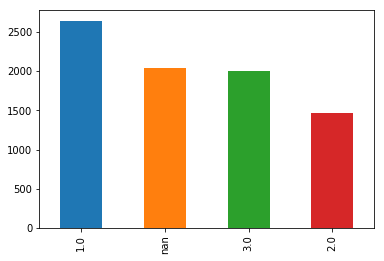

[   1 ] incm NaN count 34


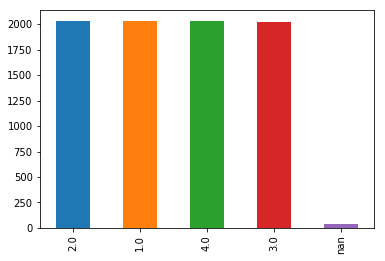

[   2 ] ho_incm NaN count 34


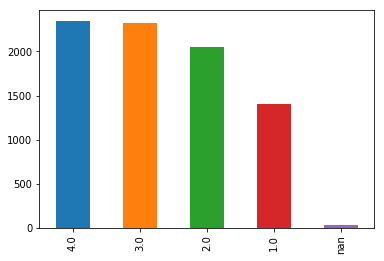

[   3 ] edu NaN count 683


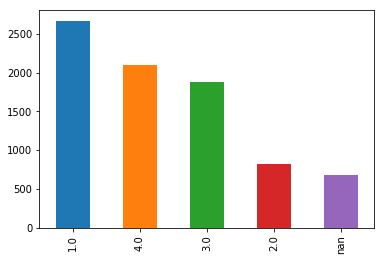

[   4 ] occp NaN count 2050


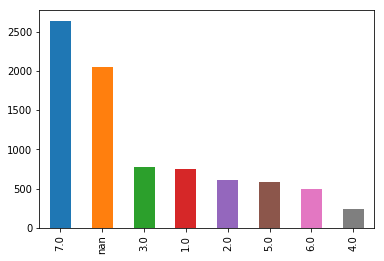

[   5 ] ainc NaN count 34


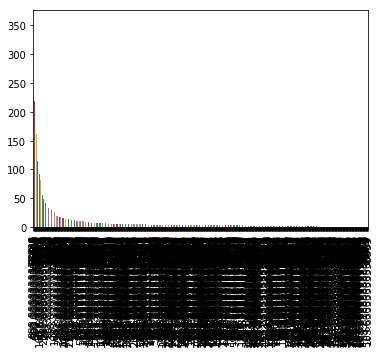

[   6 ] educ NaN count 353


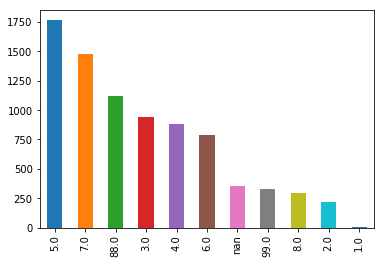

[   7 ] graduat NaN count 353


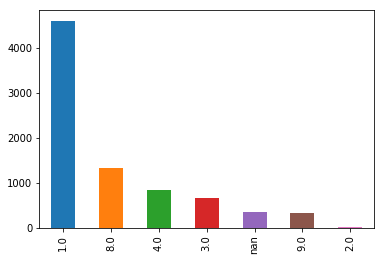

[   8 ] EC1_1 NaN count 353


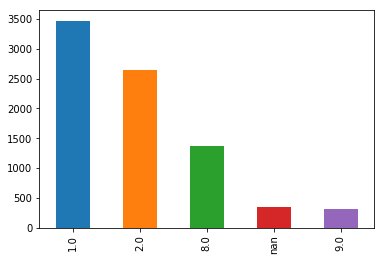

[   9 ] EC1_2 NaN count 353


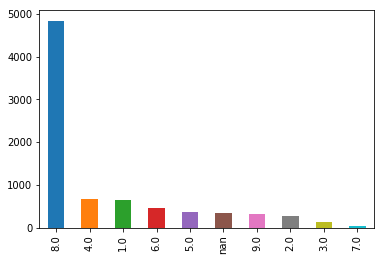

[  10 ] EC_occp NaN count 353


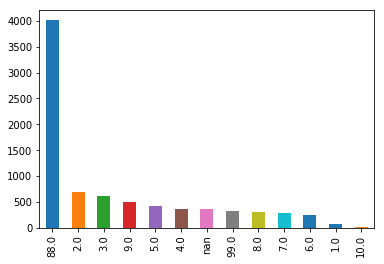

[  11 ] EC_stt_1 NaN count 353


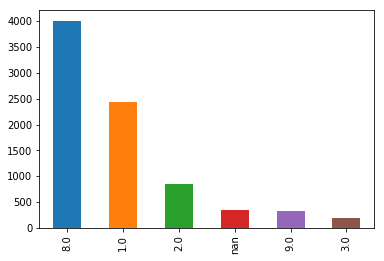

[  12 ] EC_stt_2 NaN count 353


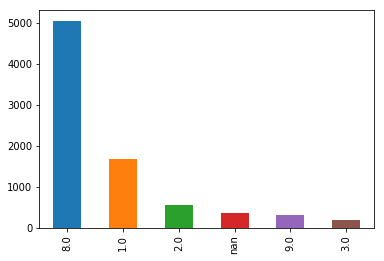

[  13 ] EC_wh NaN count 353


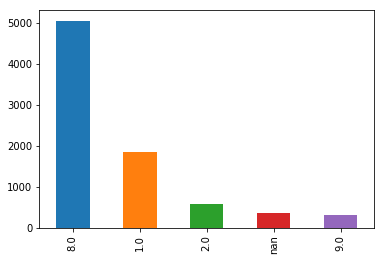

[  14 ] EC_wht_0 NaN count 353


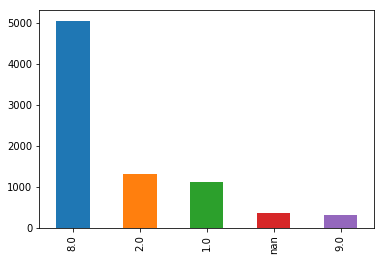

[  15 ] EC_wht_23 NaN count 353


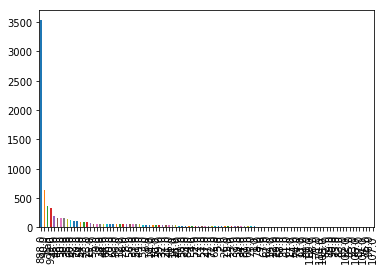

[  16 ] EC_wht_5 NaN count 353


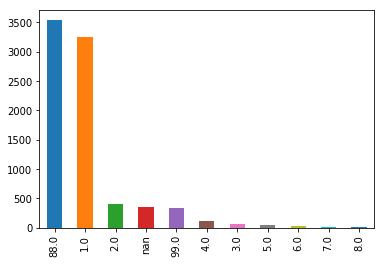

[  17 ] EC_lgw_2 NaN count 353


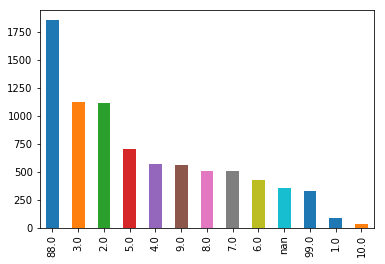

[  18 ] EC_lgw_4 NaN count 353


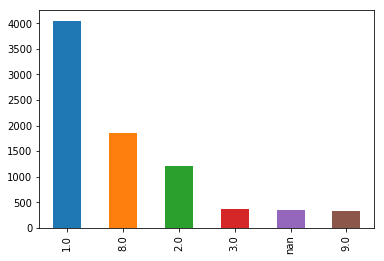

[  19 ] EC_lgw_5 NaN count 353


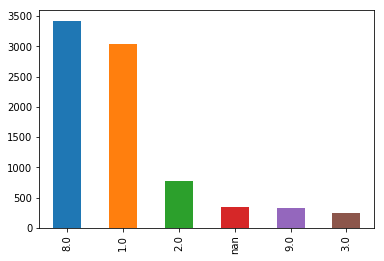

[  20 ] EC_pedu_1 NaN count 353


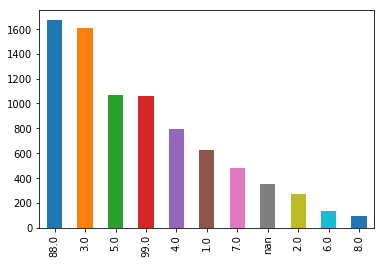

[  21 ] EC_pedu_2 NaN count 353


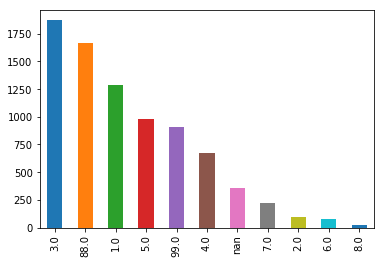

In [102]:
for index, name in enumerate(nan_names) :
    nan_count = pd.value_counts(mini_df_data[name], dropna=False)[np.nan]
    print("[ %3d ] %s NaN count %s" % (index,name,nan_count))
    pd.value_counts(mini_df_data[name], dropna=False).plot.bar()
    plt.show()

## 특정 value 값을 NaN 처리

In [73]:
def setNanValues(df_data, name, nan_values) :
    
    tmp_df = df_data.copy()
    
    start_na_count = tmp_df[name].isna().sum()
    
    uniq_values = sorted(map(float,tmp_df[name].dropna().unique()))
    
    tmp_df[name] = tmp_df[name].map(lambda x: np.nan if x in nan_values else x)
        
    #print(sorted(map(float,tmp_df[name].dropna().unique())))
        
    end_na_count = tmp_df[name].isna().sum()
    
    print("%s NaN count %s -> %s" % (name,start_na_count,end_na_count))
    
    return tmp_df
    
nan_df_data = setNanValues(mini_df_data, df_data.EC_wht_23.name, [888.0, 999.0, 12345.0])
nan_df_data.head()

EC_wht_23 NaN count 353 -> 4212


,HE_HP,region,sex,age,incm,ho_incm,edu,occp,cfam,allownc,...,EC_stt_2,EC_wh,EC_wht_0,EC_wht_23,EC_wht_5,EC_lgw_2,EC_lgw_4,EC_lgw_5,EC_pedu_1,EC_pedu_2
0,3.0,1.0,1.0,61.0,3.0,3.0,4.0,7.0,3.0,20.0,...,8.0,8.0,8.0,NaN,88.0,3.0,1.0,1.0,3.0,3.0
1,2.0,1.0,2.0,57.0,3.0,3.0,4.0,6.0,3.0,20.0,...,2.0,1.0,2.0,50.0,1.0,3.0,1.0,1.0,3.0,3.0
2,1.0,1.0,2.0,41.0,3.0,3.0,4.0,1.0,5.0,20.0,...,2.0,2.0,2.0,24.0,1.0,2.0,1.0,1.0,8.0,5.0
3,3.0,1.0,1.0,39.0,3.0,3.0,4.0,3.0,5.0,20.0,...,1.0,1.0,1.0,61.0,1.0,5.0,1.0,1.0,8.0,5.0
4,1.0,1.0,2.0,38.0,3.0,3.0,4.0,7.0,5.0,20.0,...,8.0,8.0,8.0,NaN,88.0,3.0,1.0,1.0,5.0,5.0


In [64]:
nan_df_data[df_data.EC_wht_23.name] == 888.0

0        True
1       False
2       False
3       False
4        True
5        True
6        True
7       False
8       False
9       False
10       True
11       True
12       True
13      False
14      False
15       True
16       True
17      False
18      False
19      False
20       True
21       True
22      False
23       True
24      False
25      False
26      False
27      False
28       True
29       True
        ...  
8120    False
8121    False
8122     True
8123     True
8124     True
8125    False
8126    False
8127     True
8128     True
8129     True
8130     True
8131    False
8132     True
8133     True
8134    False
8135    False
8136     True
8137     True
8138    False
8139    False
8140     True
8141     True
8142    False
8143     True
8144     True
8145    False
8146     True
8147     True
8148    False
8149    False
Name: EC_wht_23, Length: 8150, dtype: bool

In [70]:
'''
strategy = mean, median, most_frequent, constant
'''
def setNanImputer(df_data, name, strategy="mean") :
    
    tmp_df = pd.DataFrame(df_data, columns=[name])
    
    imp = SimpleImputer(strategy=strategy)
    tmp_df = pd.DataFrame(imp.fit_transform(tmp_df), columns=tmp_df.columns)
    
    nan_df = pd.concat([df_data,tmp_df],axis=1)
    
    return nan_df

nan_df_data = setNanImputer(nan_df_data,df_data.EC_wht_23.name,strategy="mean")

# 결측치가 하나 이상 있는 컬럼 확인

In [74]:
nan_names = nan_df_data[nan_df_data.isnull().any(axis=1)].columns
nan_names

Index(['HE_HP', 'region', 'sex', 'age', 'incm', 'ho_incm', 'edu', 'occp',
       'cfam', 'allownc', 'house', 'live_t', 'ainc_1', 'ainc', 'marri_1',
       'marri_2', 'tins', 'npins', 'educ', 'graduat', 'EC1_1', 'EC1_2',
       'EC_occp', 'EC_stt_1', 'EC_stt_2', 'EC_wh', 'EC_wht_0', 'EC_wht_23',
       'EC_wht_5', 'EC_lgw_2', 'EC_lgw_4', 'EC_lgw_5', 'EC_pedu_1',
       'EC_pedu_2', 'EC_wht_23'],
      dtype='object')

<IPython.core.display.Javascript object>


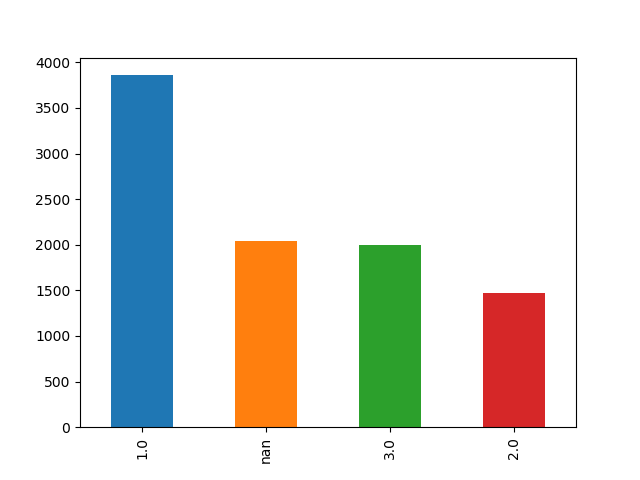

In [79]:
pd.value_counts(nan_df_data[nan_df_data.HE_HP.name], dropna=False).plot.bar()

In [17]:
for_infos = [
    ['EC_wht_23', 'median'],
    ['edu', 'mean']
]

for name, strategy in for_infos :
    nan_median_df = setNanImputer(nan_df,name, strategy)

   EC_wht_23
0  39.978669
1  50.000000
2  24.000000
3  61.000000
4  39.978669
   EC_wht_23
0       40.0
1       50.0
2       24.0
3       61.0
4       40.0
   EC_wht_23
0       40.0
1       50.0
2       24.0
3       61.0
4       40.0


In [20]:
def addOneHotEncodingColumns(df_data, name) :
    
    uniq_values = sorted(map(float,getattr(df_data,name).dropna().unique()))
    
    one_hot_df = pd.get_dummies(getattr(df_data,name), dummy_na=True)
    one_hot_df.columns=['%s_%s' % (name,str(n)) for n in uniq_values] + ['%s_NaN' % name]
    
    one_hot_concat_df = pd.concat([df_data,one_hot_df],axis=1)
    one_hot_concat_df.drop([name], axis=1, inplace=True)
    
    return one_hot_concat_df

one_host_df = addOneHotEncodingColumns(mini_df_data, df_data.region.name)
one_host_df = addOneHotEncodingColumns(one_host_df, df_data.edu.name)
one_host_df = addOneHotEncodingColumns(one_host_df, df_data.EC_wht_23.name)
one_host_df.head()

,HE_HP,sex,age,incm,ho_incm,occp,cfam,allownc,house,live_t,...,EC_wht_23_102.0,EC_wht_23_104.0,EC_wht_23_105.0,EC_wht_23_106.0,EC_wht_23_107.0,EC_wht_23_110.0,EC_wht_23_112.0,EC_wht_23_888.0,EC_wht_23_999.0,EC_wht_23_NaN
0,3.0,1.0,61.0,3.0,3.0,7.0,3.0,20.0,2.0,2.0,...,0,0,0,0,0,0,0,1,0,0
1,2.0,2.0,57.0,3.0,3.0,6.0,3.0,20.0,2.0,2.0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,2.0,41.0,3.0,3.0,1.0,5.0,20.0,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0
3,3.0,1.0,39.0,3.0,3.0,3.0,5.0,20.0,3.0,2.0,...,0,0,0,0,0,0,0,0,0,0
4,1.0,2.0,38.0,3.0,3.0,7.0,5.0,20.0,3.0,2.0,...,0,0,0,0,0,0,0,1,0,0


In [208]:
def printNan(name) :
    return(one_host_df[pd.isna(getattr(df_data,name))][[n for n in one_host_df.columns if n.startswith(name)]])

printNan(df_data.EC_wht_23.name).head()

,EC_wht_23,EC_wht_23_1.0,EC_wht_23_2.0,EC_wht_23_3.0,EC_wht_23_4.0,EC_wht_23_5.0,EC_wht_23_6.0,EC_wht_23_7.0,EC_wht_23_8.0,EC_wht_23_9.0,...,EC_wht_23_102.0,EC_wht_23_104.0,EC_wht_23_105.0,EC_wht_23_106.0,EC_wht_23_107.0,EC_wht_23_110.0,EC_wht_23_112.0,EC_wht_23_888.0,EC_wht_23_999.0,EC_wht_23_NaN
75,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
76,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
80,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
91,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
103,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [21]:
'''
convert numeric
'''
one_host_df = one_host_df.convert_objects(convert_numeric=True)

C:\Apps\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


In [22]:
def runDTR(in_df, x_name_list, y_name) :

    arrX = in_df[x_name_list]
    arrY = in_df[y_name]

    #print("x na : ", arrX1[x_name].isna().sum())
    #print("y na : ", arrY.isna().sum())
    #arrY = arrY.fillna(-1)

    model = DecisionTreeClassifier(
        criterion = 'gini',
        max_depth=4
    ).fit(arrX,arrY)
    
    pdf_name = "./pdf_multi_class/%s_feature-%s" % (y_name,x_name_list.__len__())
    print(pdf_name)

    dot_data = tree.export_graphviz(model,
                                    out_file=None, 
                                    feature_names=x_name_list, 
                                    # class_names=['정상', '고혈압전단계', '고혈압']
                                    class_names=['1','2','3']
                                   )

    graph = graphviz.Source(dot_data) 
    graph.render(pdf_name)
    #graph.render("%s+%s" % (x_name,y_name))

    modelPrediction = model.predict(arrX)
    accuracyRate = accuracy_score(
        y_true=arrY
    ,   y_pred=modelPrediction
    )

    #print('정확도 = ', accuracyRate)

    return accuracyRate

In [41]:
'''
pd.value_counts(one_host_df[one_host_df.HE_Uacid.name]).sort_index()
print(one_host_df[one_host_df.HE_HP.name].dtype)
print(one_host_df[one_host_df.HE_HP.name][:5])

print(one_host_df[one_host_df.HE_Uacid.name].dtype)
print(one_host_df[one_host_df.HE_Uacid.name][:5])
'''

Y = one_host_df.HE_HP.name
X = one_host_df.columns.drop(Y)
print(type(X))
print(X)

runDTR(one_host_df, X, Y)

<class 'pandas.core.indexes.base.Index'>
Index(['sex', 'age', 'incm', 'ho_incm', 'occp', 'cfam', 'allownc', 'house',
       'live_t', 'ainc_1',
       ...
       'EC_wht_23_102.0', 'EC_wht_23_104.0', 'EC_wht_23_105.0',
       'EC_wht_23_106.0', 'EC_wht_23_107.0', 'EC_wht_23_110.0',
       'EC_wht_23_112.0', 'EC_wht_23_888.0', 'EC_wht_23_999.0',
       'EC_wht_23_NaN'],
      dtype='object', length=155)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [9]:
check_count = 0
for name in df_filter.columns :
    
    # 2 < count < 20
    value_counts = pd.value_counts(getattr(df_filter, name)).sort_index()
    key_count = len(value_counts.keys())
    if(key_count < 3 or 20 < key_count) : continue
    
    # int 변환이 가능한 것
    try :
      [int(k) for k in value_counts.keys()]
    except : 
        #print("%s pass" % name)
        continue
        
    print("\n", value_counts)
    check_count += 1

check_count    


 1.0      930
2.0      311
3.0      234
4.0      260
5.0      158
6.0      156
7.0       87
8.0      109
9.0     1113
10.0     126
11.0     141
12.0     178
13.0     154
14.0     156
15.0     232
16.0     269
17.0      94
Name: region, dtype: int64

 1.0    1154
2.0    1196
3.0    1178
4.0    1180
Name: incm, dtype: int64

 1.0     683
2.0    1136
3.0    1409
4.0    1480
Name: ho_incm, dtype: int64

 1.0     668
2.0     393
3.0    1531
4.0    2116
Name: edu, dtype: int64

 1.0     675
2.0     550
3.0     627
4.0     145
5.0     464
6.0     348
7.0    1899
Name: occp, dtype: int64

 1.0     444
2.0    1127
3.0    1282
4.0    1367
5.0     386
6.0     102
Name: cfam, dtype: int64

 1.0     444
2.0     834
3.0      66
4.0    2352
5.0     393
6.0     251
7.0     368
Name: genertn, dtype: int64

 10.0     264
20.0    4441
99.0       3
Name: allownc, dtype: int64

 1.0    1489
2.0    2531
3.0     686
9.0       2
Name: house, dtype: int64

 1.0    1508
2.0    2751
3.0     238
4.0     176
5.0 

Name: DL1_pt, dtype: int64

 0.0    3789
1.0     707
9.0     212
Name: DJ8_dg, dtype: int64

 0.0      93
1.0     614
8.0    3789
9.0     212
Name: DJ8_pr, dtype: int64

 0.0     483
1.0     224
8.0    3789
9.0     212
Name: DJ8_pt, dtype: int64

 0.0    4201
1.0     295
9.0     212
Name: DJ6_dg, dtype: int64

 0.0     174
1.0     121
8.0    4201
9.0     212
Name: DJ6_pr, dtype: int64

 0.0     258
1.0      37
8.0    4201
9.0     212
Name: DJ6_pt, dtype: int64

 0.0    4247
1.0     248
9.0     213
Name: DH4_dg, dtype: int64

 0.0     209
1.0      39
8.0    4247
9.0     213
Name: DH4_pr, dtype: int64

 0.0     232
1.0      16
8.0    4247
9.0     213
Name: DH4_pt, dtype: int64

 0.0    4155
1.0     340
9.0     213
Name: DH2_dg, dtype: int64

 0.0     181
1.0     159
8.0    4155
9.0     213
Name: DH2_pr, dtype: int64

 0.0     249
1.0      91
8.0    4155
9.0     213
Name: DH2_pt, dtype: int64

 0.0    4437
1.0      58
9.0     213
Name: DH3_dg, dtype: int64

 0.0      12
1.0      46
8.0   

Name: BP7, dtype: int64

 1.0     106
2.0    1707
3.0    2820
9.0      75
Name: BS1_1, dtype: int64

 1.0     774
2.0     148
3.0     891
8.0    2820
9.0      75
Name: BS3_1, dtype: int64

 1.0       11
2.0        9
3.0       15
4.0        5
5.0       12
7.0        6
8.0        1
10.0      18
12.0       1
15.0      25
18.0       1
20.0      37
22.0       1
25.0       1
28.0       1
30.0       4
88.0    4485
99.0      75
Name: BS3_3, dtype: int64

 0.0      696
1.0       48
2.0       36
3.0       23
4.0        5
5.0       21
6.0       26
7.0        6
8.0        7
9.0        5
10.0      15
11.0       3
88.0    3742
99.0      75
Name: BS6_2_2, dtype: int64

 0.0      649
1.0       43
2.0       26
3.0       28
4.0       12
5.0       26
6.0       46
7.0        9
8.0       14
9.0        9
10.0      24
11.0       5
88.0    3742
99.0      75
Name: BS6_4_2, dtype: int64

 1.0     207
2.0     288
3.0     141
4.0     286
8.0    3711
9.0      75
Name: BS5_4, dtype: int64

 1.0     540
2.0     382


Name: FF_RICE, dtype: int64

 1.0      882
2.0     3075
3.0       92
4.0       28
88.0     182
99.0     449
Name: FA_RICE, dtype: int64

 1.0      316
2.0       95
3.0      152
4.0      139
5.0      268
6.0       93
7.0      666
8.0     2259
9.0      271
99.0     449
Name: FF_BARLEY, dtype: int64

 1.0      954
2.0     2897
3.0       77
4.0       15
88.0     316
99.0     449
Name: FA_BARLEY, dtype: int64

 1.0      779
2.0      578
3.0     2167
4.0      500
5.0      228
6.0        5
7.0        2
99.0     449
Name: FF_BIBIM, dtype: int64

 1.0      300
2.0     3024
3.0      156
88.0     779
99.0     449
Name: FA_BIBIM, dtype: int64

 1.0     2382
2.0      759
3.0      678
4.0      299
5.0      129
6.0        7
7.0        3
8.0        2
99.0     449
Name: FF_GIMBAB, dtype: int64

 1.0       96
2.0     2634
3.0      228
4.0      304
88.0     997
99.0     449
Name: FA_GIMBAB, dtype: int64

 1.0     2804
2.0      870
3.0      483
4.0       85
5.0       16
7.0        1
99.0     449
Name: FF_

Name: FF_S_EGG, dtype: int64

 1.0       90
2.0     2567
3.0      745
88.0     857
99.0     449
Name: FA_S_EGG, dtype: int64

 1.0      425
2.0      695
3.0     2322
4.0      563
5.0      246
6.0        8
99.0     449
Name: FF_R_PORK, dtype: int64

 1.0      374
2.0     2874
3.0      586
88.0     425
99.0     449
Name: FA_R_PORK, dtype: int64

 1.0     2812
2.0      969
3.0      331
4.0      112
5.0       30
6.0        3
7.0        2
99.0     449
Name: FF_S_PORK, dtype: int64

 1.0      295
2.0      746
3.0      406
88.0    2812
99.0     449
Name: FA_S_PORK, dtype: int64

 1.0      711
2.0     2362
3.0      741
4.0      318
5.0      120
6.0        7
99.0     449
Name: FF_F_PORK, dtype: int64

 1.0      505
2.0     2532
3.0      511
88.0     711
99.0     449
Name: FA_F_PORK, dtype: int64

 1.0     2560
2.0      895
3.0      530
4.0      220
5.0       52
6.0        2
99.0     449
Name: FF_C_PORK, dtype: int64

 1.0      326
2.0      905
3.0      468
88.0    2560
99.0     449
Name: FA_C_P

Name: FA_SVEG, dtype: int64

 1.0     3107
2.0      497
3.0      361
4.0      177
5.0       88
6.0       20
7.0        7
8.0        2
99.0     449
Name: FF_ROOT, dtype: int64

 1.0      288
2.0      648
3.0      216
88.0    3107
99.0     449
Name: FA_ROOT, dtype: int64

 1.0     2437
2.0      964
3.0      580
4.0      207
5.0       70
6.0        1
99.0     449
Name: FF_PCAKE, dtype: int64

 1.0      417
2.0      545
3.0      860
88.0    2437
99.0     449
Name: FA_PCAKE, dtype: int64

 1.0     3093
2.0      842
3.0      267
4.0       50
5.0        7
99.0     449
Name: FF_F_VEG, dtype: int64

 1.0       74
2.0      383
3.0      709
88.0    3093
99.0     449
Name: FA_F_VEG, dtype: int64

 1.0     2392
2.0      714
3.0      614
4.0      350
5.0      170
6.0       12
7.0        5
8.0        1
9.0        1
99.0     449
Name: FF_MUSHRO, dtype: int64

 1.0      126
2.0      749
3.0      992
88.0    2392
99.0     449
Name: FA_MUSHRO, dtype: int64

 1.0      328
2.0      303
3.0      512
4.0    

Name: FF_TANG_YR, dtype: int64

 1.0      270
2.0      864
3.0     2955
88.0     170
99.0     449
Name: FA_TANG, dtype: int64

 1.0      192
2.0     4067
99.0     449
Name: FS_BANANA, dtype: int64

 1.0      595
2.0      533
3.0     2027
4.0      547
5.0      425
6.0       72
7.0       58
8.0        2
99.0     449
Name: FF_BANANA, dtype: int64

 1.0     2513
2.0       47
3.0      640
4.0      532
5.0      402
6.0       70
7.0       53
8.0        2
99.0     449
Name: FF_BANANA_YR, dtype: int64

 1.0       96
2.0     3168
3.0      400
88.0     595
99.0     449
Name: FA_BANANA, dtype: int64

 1.0     1160
2.0     3099
99.0     449
Name: FS_CITRUS, dtype: int64

 1.0     2363
2.0      587
3.0      486
4.0      392
5.0      331
6.0       46
7.0       46
8.0        6
9.0        2
99.0     449
Name: FF_CITRUS, dtype: int64

 1.0     3472
3.0      496
4.0      201
5.0       84
6.0        5
7.0        1
99.0     449
Name: FF_CITRUS_YR, dtype: int64

 1.0      345
2.0     2687
3.0      249
88.0 

Name: FQ_OKIMCH, dtype: int64

 0.000000     2841
0.232558      418
0.581395      495
1.000000      398
3.000000      363
5.500000       66
7.000000      100
14.000000      19
21.000000       8
Name: FQ_SVEG, dtype: int64

 0.000000     3556
0.232558      497
0.581395      361
1.000000      177
3.000000       88
5.500000       20
7.000000        7
14.000000       2
Name: FQ_ROOT, dtype: int64

 0.000000    2886
0.232558     964
0.581395     580
1.000000     207
3.000000      70
5.500000       1
Name: FQ_PCAKE, dtype: int64

 0.000000    3542
0.232558     842
0.581395     267
1.000000      50
3.000000       7
Name: FQ_F_VEG, dtype: int64

 0.000000     2841
0.232558      714
0.581395      614
1.000000      350
3.000000      170
5.500000       12
7.000000        5
14.000000       1
21.000000       1
Name: FQ_MUSHRO, dtype: int64

 0.000000      328
0.232558      303
0.581395      512
1.000000      537
3.000000     2656
5.500000      210
7.000000      125
14.000000      31
21.000000      

Name: FQ_CHOCO, dtype: int64

 0.000000    2782
0.232558     585
0.581395     693
1.000000     408
3.000000     210
5.500000      24
7.000000       6
Name: FQ_ICECM, dtype: int64

 0.000000    3729
0.232558     443
0.581395     272
1.000000     122
3.000000      90
5.500000      24
7.000000      28
Name: FQ_PEANUT, dtype: int64

 0.000000    3911
0.232558     555
0.581395     187
1.000000      38
3.000000      10
5.500000       4
7.000000       3
Name: FQ_CHNUT, dtype: int64

 0.000000     3382
0.232558      343
0.581395      297
1.000000      221
3.000000      374
5.500000       52
7.000000       36
14.000000       2
21.000000       1
Name: FQ_SOJU, dtype: int64

 0.000000     3245
0.232558      372
0.581395      392
1.000000      301
3.000000      339
5.500000       39
7.000000       19
14.000000       1
Name: FQ_BEER, dtype: int64

 0.000000    4272
0.232558     218
0.581395     111
1.000000      53
3.000000      46
5.500000       4
7.000000       4
Name: FQ_RWINE, dtype: int64


820